# high-level scientific computing

* scipy는 과학기술 계산을 위한 패키지임 

### Interpolation(보간법)
scipy.interpolate 는 실험 결과 자료로 부터 실험하지 않은 결과를 추정하는데 유용한 방법이다.


In [3]:
import numpy as np
from matplotlib import pyplot as plt
measured_time = np.linspace(0, 1, 10)
noise = (np.random.random(10)*2 - 1) * 1e-1
measures = np.sin(2 * np.pi * measured_time) + noise
measures

array([-0.04370468,  0.71643063,  1.0495057 ,  0.83288858,  0.25592559,
       -0.39658609, -0.80450986, -1.01661635, -0.63603007,  0.08248809])

In [4]:
noise

array([ 0.05461763, -0.03988358,  0.01072205, -0.02111382, -0.06762708,
       -0.0470935 ,  0.06400728,  0.03243695, -0.00360436, -0.01631605])

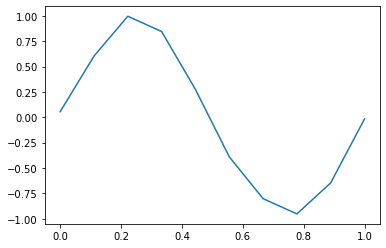

In [5]:
plt.plot(measured_time, measures) # 시험을 통해 10개 포인트의 결과를 얻었다고 가정하자.
plt.show()

In [6]:
# 관측하지 않은 포인트의 값을 추정해보자. 
from scipy.interpolate import interp1d
linear_interp = interp1d(measured_time, measures)
interpolation_time = np.linspace(0, 1, 50)
linear_results = linear_interp(interpolation_time)
linear_results # 선형 보간법에 의해 50개의 포인트를 추정하였다.

array([ 0.05461763,  0.1553233 ,  0.25602896,  0.35673463,  0.45744029,
        0.55814596,  0.64296789,  0.71508282,  0.78719776,  0.8593127 ,
        0.93142764,  0.99245596,  0.96479139,  0.93712682,  0.90946225,
        0.88179768,  0.8541331 ,  0.77505217,  0.67026305,  0.56547394,
        0.46068482,  0.3558957 ,  0.24731115,  0.12544257,  0.003574  ,
       -0.11829458, -0.24016316, -0.36203174, -0.4481    , -0.5239396 ,
       -0.5997792 , -0.6756188 , -0.7514584 , -0.81122339, -0.83883919,
       -0.86645499, -0.89407079, -0.92168659, -0.94930238, -0.90241508,
       -0.84621488, -0.79001469, -0.73381449, -0.6776143 , -0.5949572 ,
       -0.47922897, -0.36350074, -0.24777251, -0.13204428, -0.01631605])

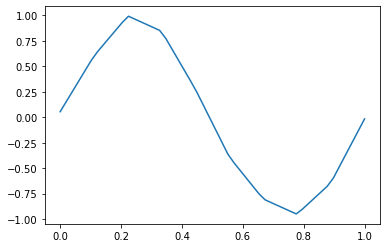

In [7]:
plt.plot(interpolation_time, linear_results)
plt.show()

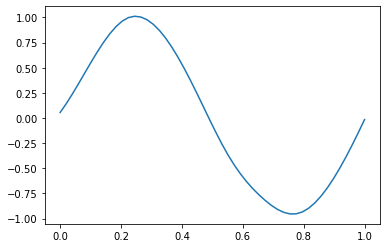

In [8]:
# 3차 곡선 보간에 의해 추정
cubic_interp = interp1d(measured_time, measures, kind='cubic')
cubic_results = cubic_interp(interpolation_time)
plt.plot(interpolation_time, cubic_results)
plt.show()

### Optimization and fit (최적 적합)

In [9]:
import numpy as np
from matplotlib import pyplot as plt
x_data = np.linspace(-5, 5, num=50)
y_data = 2.9 * np.sin(1.5 * x_data) + np.random.normal(size=50) # noise발생

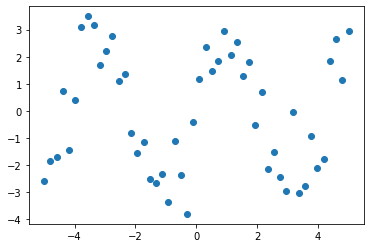

In [10]:
plt.scatter(x_data, y_data)
plt.show()

In [11]:
def test_func(x, a, b):
    return a * np.sin(b * x)
from scipy import optimize
params, params_covariance = optimize.curve_fit(test_func, x_data, y_data)
print(params)

[2.74822734 1.47997233]


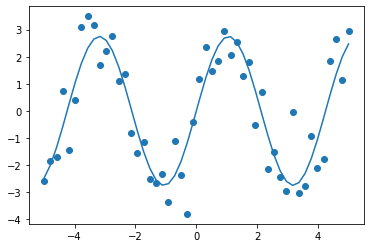

In [12]:
yHat = test_func(x_data, params[0], params[1])
plt.scatter(x_data, y_data)
plt.plot(x_data, yHat)
plt.show()

### Finding minimum of scalar function

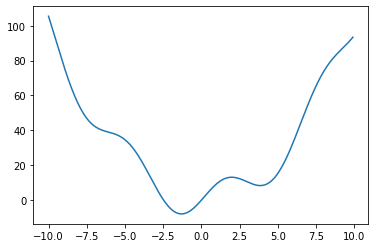

In [13]:
def f(x):
    return x**2 + 10*np.sin(x)

x = np.arange(-10, 10, 0.1)
plt.plot(x, f(x))
plt.show() # 이 함수의 최소는 -1.3 근방이고, 지역 최소는 3.8 근방이다.


In [14]:
from scipy import optimize
result = optimize.minimize(f, x0=0)
result.x

array([-1.3064401])

### Bisection Method(이분법)



![Bisection](https://drive.google.com/uc?id=1HpC4mdh5Yhki4gB2iau98uTh1yFJdKNJ)

* Step 1: 초기값 a, b를 설정한다. (해를 포함하는 구간으로 설정)<br>

   Let interval = (b-a) / 2; m = a + interval

* Step 2: Convexity를 체크한다.<br>

   상단 그림은 해가 [a, b] 사이에 있는 것이고, 하단 그림은 [a, b] 사이에 해가 없는 경우이다. <br>
   만약 해가  [a, b]에 있다면, f(a), f(b) > f(m)를 만족한다. <br>
   이때는 b=m, m = (a+b)/2, interval = interval / 2 로 수정하고 반복한다.<br>
   해가 [a, b]에 없다면 움직이는 방향을 결정해야 한다.<br>
   만약, f(a) > f(m) > f(b) 이라면 오른쪽으로 움직이고 f(a) < f(m) < f(b)라면 왼쪽으로 움직인다. <br>
   오른쪽으로 움직일 때에는 a = a + interval, 왼쪽으로 움직일 때에는 a = a - interval 로 정의하고 <br>
   m = a + interval, b = m + interval 로 정의하고 반복하다.<br>
   
   interval이 너무 작아 무시할 만하면 반복을 중지하고 m을 출력한다.
   
<br>

###  Gradient Descent Algorithm(경사하강법)
$ x = x - \alpha \frac {\partial}{\partial x} f(x), \alpha $  is learning rate
#### Exercise: 2차원 함수의 최소 위치 구하기
The six-hump camelback function
$$ f(x,y) =\big (4 - 2.1 x^2 + \frac {x^4}{3} \big)x^2 + xy+(4y^2 -4)y^2 $$

위 함수는 global minimum과 여러개의 local minimum을 갖는다.<br> 
이 함수의 global minimum 위치를 구해보자.


In [15]:
import numpy as np
from matplotlib import pyplot as plt

# Define the function that we are interested in
def sixhump(x):
    return ((4 - 2.1*x[0]**2 + x[0]**4 / 3.) * x[0]**2 + x[0] * x[1]
           + (-4 + 4*x[1]**2) * x[1] **2)
# Make a grid to evaluate the function (for plotting)
x = np.linspace(-2, 2)
y = np.linspace(-1, 1)
xg, yg = np.meshgrid(x, y)

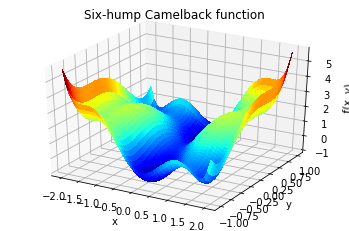

In [16]:
from mpl_toolkits.mplot3d import Axes3D
fig = plt.figure()
ax = fig.add_subplot(111, projection='3d')
surf = ax.plot_surface(xg, yg, sixhump([xg, yg]), rstride=1, cstride=1,
cmap=plt.cm.jet, linewidth=0, antialiased=False)
ax.set_xlabel('x')
ax.set_ylabel('y')
ax.set_zlabel('f(x, y)')
ax.set_title('Six-hump Camelback function')
plt.show()

In [17]:
from scipy import optimize
x_min = optimize.minimize(sixhump, x0=[-2,1])
print(x_min.x[0], x_min.x[1])

-0.08984200590999139 0.7126563957894118


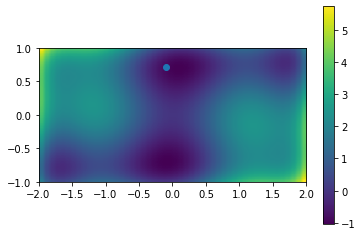

In [18]:
# Show the function in 2D
plt.imshow(sixhump([xg, yg]), extent=[-2, 2, -1, 1])
plt.colorbar()
# And the minimum that we've found:
plt.scatter(x_min.x[0], x_min.x[1])
plt.show()


### 함수의 해 구하기
f(x) = 0를 만족하는 해를 구해보자.


In [28]:
def f(x):
    return x**2 + 10*np.sin(x)
root = optimize.root(f, x0=1)

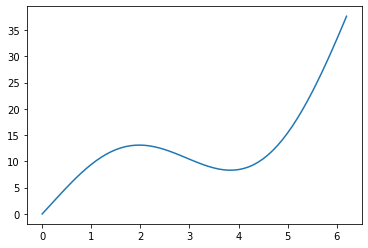

In [29]:
x = np.arange(0, 2*np.pi, 0.1)
plt.plot(x, f(x))
plt.show()

In [30]:
root.x

array([0.])

In [33]:
root2 = optimize.root(f, x0 =-2.5)

In [34]:
root2.x

array([-2.47948183])

In [35]:
f(-2.47948183)

-4.5491847622258774e-08

###  Image manipulation: scipy.ndimage 

In [1]:
from scipy import misc # Load an image
face = misc.face(gray=True)
from scipy import ndimage # Shift, roate and zoom it
shifted_face = ndimage.shift(face, (50, 50))
shifted_face2 = ndimage.shift(face, (50, 50), mode='nearest')
rotated_face = ndimage.rotate(face, 30)
cropped_face = face[50:-50, 50:-50]
zoomed_face = ndimage.zoom(face, 4)
face.shape

(768, 1024)

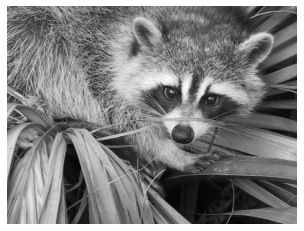

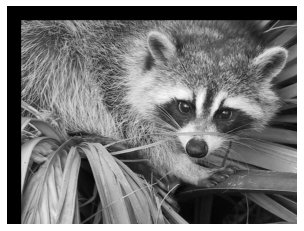

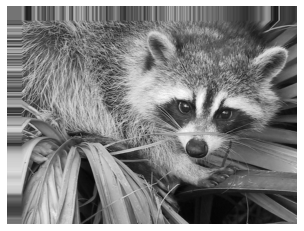

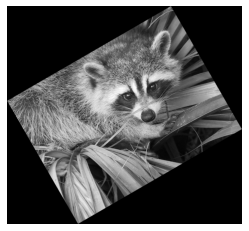

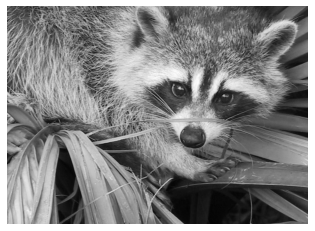

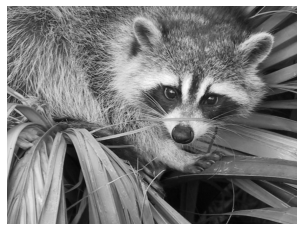

In [4]:
plt.imshow(face, cmap=plt.cm.gray)
plt.axis('off')
plt.show()
plt.imshow(shifted_face, cmap=plt.cm.gray)
plt.axis('off')
plt.show()
plt.imshow(shifted_face2, cmap=plt.cm.gray)
plt.axis('off')
plt.show()
plt.imshow(rotated_face, cmap=plt.cm.gray)
plt.axis('off')
plt.show()
plt.imshow(cropped_face, cmap=plt.cm.gray)
plt.axis('off')
plt.show()
plt.imshow(zoomed_face, cmap=plt.cm.gray)
plt.axis('off')
plt.show()

* 이미지 회전 알고리즘 <br>
  P(x,y)를 각도 $\theta$ 만큼 반시계방향으로 회전하면 아래와 같이 $P'(xcos(\theta)-ysin(\theta), xsin(\theta)+ycos(\theta)) $ 이 된다. 
  
  이를 행렬로 나타내면 
  
   $$
   \begin{equation*}
   \left(\begin{array}{cc} x'\\
                           y'\end{array}\right) = 
   \left(\begin{array}{cc} cos \theta & -sin \theta \\
                           sin \theta & cos \theta \end{array}\right)
   \left(\begin{array}{cc} x\\
                           y\end{array}\right)                        
\end{equation*}  $$

  이를 변환된 이미지 기준으로 변형하면 아래와 같이 변환하면 된다. 

  $$
   \begin{equation*}
   \left(\begin{array}{cc} x\\
                           y\end{array}\right) = 
   \left(\begin{array}{cc} cos \theta & sin \theta \\
                           -sin \theta & cos \theta \end{array}\right)
   \left(\begin{array}{cc} x'\\
                           y'\end{array}\right)                        
\end{equation*}  $$
![rotate](https://drive.google.com/uc?id=1b7i7ksCtk_MIMLmqMb6KMEk4WxMp-5t4)

### Image filtering

In [5]:
from scipy import misc
face = misc.face(gray=True)
face = face[:512, -512:] # crop out square on right
noisy_face = np.copy(face).astype(np.float)
noisy_face += face.std() * 0.5 * np.random.standard_normal(face.shape)

In [6]:
blurred_face = ndimage.gaussian_filter(noisy_face, sigma=3)
median_face = ndimage.median_filter(noisy_face, size=5)

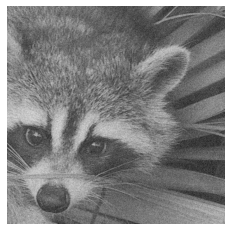

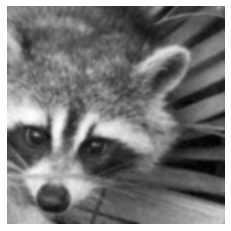

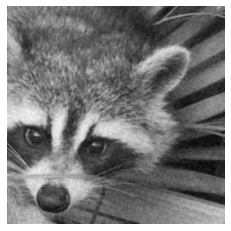

In [7]:
plt.imshow(noisy_face, cmap=plt.cm.gray)
plt.axis('off')
plt.show()
plt.imshow(blurred_face, cmap=plt.cm.gray)
plt.axis('off')
plt.show()
plt.imshow(median_face, cmap=plt.cm.gray)
plt.axis('off')
plt.show()

 * Gaussian Filter

 ![gaussianFilter](https://drive.google.com/uc?id=1dQwVUf2ifgpO_tIj9O3QC291mNApwl87)
 
 * Median Filter

   ![medianFilter](https://drive.google.com/uc?id=1znF-fK0CfTXHeUiqFLJ9GxkZGA9yHNXh)
<br>
median of [33, 54, 67, 84, 102, 163, 189, 212, 224] = 102 <br>
Window[0,0] = 102 (Change 189 -> 102)

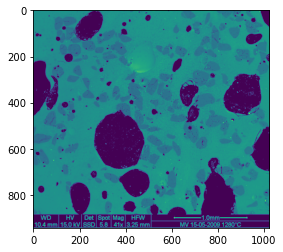

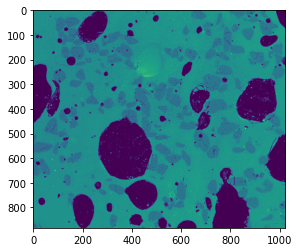

(883, 1024)

In [9]:
import numpy as np
import matplotlib.pyplot as plt
from scipy import ndimage # Shift, roate and zoom it
dat = plt.imread('./image/MV_HFV_012.jpg')

plt.imshow(dat)
plt.show()
dat = dat[:-60]
plt.imshow(dat)
plt.show()
dat.shape

In [10]:
filtdat = ndimage.median_filter(dat, size=(7,7))
filtdat.shape

(883, 1024)

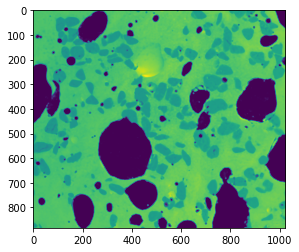

In [11]:
plt.imshow(filtdat)
plt.show()

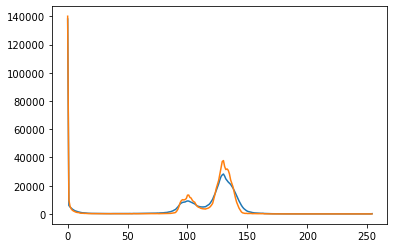

In [12]:
hi_dat, bins = np.histogram(dat, bins=np.arange(256))
hi_filtdat,  bins = np.histogram(filtdat, bins=np.arange(256))
fig, ax = plt.subplots()
ax.plot(bins[:-1], hi_dat)
ax.plot(bins[:-1], hi_filtdat)
plt.show()

In [13]:
# (883, 1024) Picture marks sand and glass as True or False
area1 = filtdat <= 80
area2 = np.logical_and(filtdat > 80, filtdat <= 114)
area3 = filtdat > 114

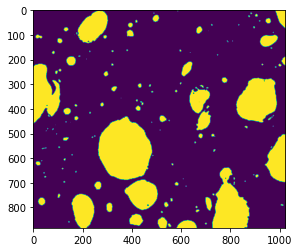

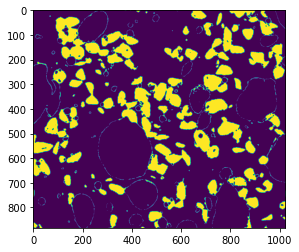

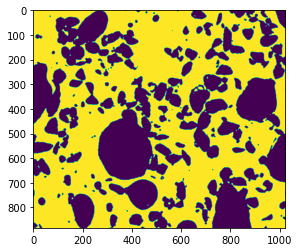

In [14]:
plt.imshow(area1.astype(np.int)) # void area
plt.show()
plt.imshow(area2.astype(np.int)) # unmolten grain area
plt.show()
plt.imshow(area3.astype(np.int)) # glass area
plt.show()

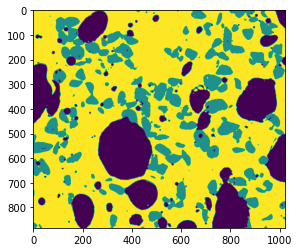

In [15]:
phases = area1.astype(np.int) + 2*area2.astype(np.int) + 3*area3.astype(np.int)
plt.imshow(phases) 
plt.show()

In [16]:
# area labeling and counting example
from scipy.ndimage import label, generate_binary_structure
a = np.array([[0,0,1,1,0,0],
              [0,0,0,1,0,0],
              [1,1,0,0,1,0],
              [0,0,0,1,0,0]])
labeled_array, num_features = label(a)
labeled_array, num_features

(array([[0, 0, 1, 1, 0, 0],
        [0, 0, 0, 1, 0, 0],
        [2, 2, 0, 0, 3, 0],
        [0, 0, 0, 4, 0, 0]]),
 4)

In [17]:
area1_op = ndimage.binary_opening(area1, iterations=2) # corner smoothing
area1_labels, area1_nb = ndimage.label(area1_op) # void area labeling and counting

In [18]:
area1_nb 

107

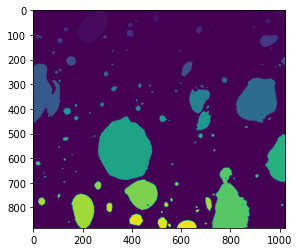

In [19]:
plt.imshow(area1_labels.astype(np.int)) 